<h1 style='color: skyblue;'>Team Bit by Bit Regression</h1>

<h2 style='color: orange;'>Imputing Missing Numerical Values using Mean and Categorical Values using Mode</h2>

In [1215]:
import pandas as pd
import numpy as np
df = pd.read_csv('ML101_train_dataset.csv')

df.drop(['LifeStyle'],axis=1,inplace=True)

numeric_cols = df.select_dtypes(include=['float']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_category = df[col].mode()[0]
    df[col].fillna(mode_category, inplace=True)
df

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Gender,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP
0,15725.0,6.518042,1714.0,56.0,Male,178.416872,75.489346,185.408550,104.442836,172.813045,75.552416
1,6733.0,9.176300,2508.0,69.0,Female,176.826592,54.635484,191.698148,104.825187,198.729261,-103.634282
2,7424.0,4.856772,1366.0,46.0,Male,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911
3,11853.0,9.727244,2189.0,32.0,Female,167.812041,59.397202,205.440351,121.982302,204.527361,99.791603
4,7521.0,6.433183,2342.0,48.0,Male,145.273232,62.574740,161.368583,126.408787,187.882666,88.240932
...,...,...,...,...,...,...,...,...,...,...,...
99995,2265.0,7.013760,2030.0,53.0,Male,182.202253,65.035350,212.133380,115.360556,348.653753,94.387259
99996,10959.0,9.661165,2233.0,22.0,Male,185.802297,63.457075,227.699267,112.321197,205.758576,97.740461
99997,10488.0,7.378317,2080.0,37.0,Male,167.812041,41.227254,224.300704,121.369845,195.905161,-107.061245
99998,12110.0,9.843323,1434.0,72.0,Female,155.025779,106.908491,140.865132,94.524506,149.675364,200.964967


In [1216]:
df.isnull().mean()*100

Average Daily Steps    0.0
Hours of Sleep         0.0
Caloric Intake         0.0
Age                    0.0
Gender                 0.0
Height                 0.0
Weight                 0.0
Cholesterol level      0.0
Blood Sugar level      0.0
Systolic BP            0.0
Diastolic BP           0.0
dtype: float64

In [1217]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

<h2 style='color: orange;'>Performing OneHotEncoding on Gender column using Pandas</h2>

In [1218]:
mode_value = df['Gender'].mode()[0]
df['Gender'].fillna(mode_value, inplace=True)

df = pd.get_dummies(df,columns=['Gender'])
df['Gender_Female'] = df['Gender_Female'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [1219]:
df

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP,Gender_Female,Gender_Male
0,15725.0,6.518042,1714.0,56.0,178.416872,75.489346,185.408550,104.442836,172.813045,75.552416,0,1
1,6733.0,9.176300,2508.0,69.0,176.826592,54.635484,191.698148,104.825187,198.729261,-103.634282,1,0
2,7424.0,4.856772,1366.0,46.0,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911,0,1
3,11853.0,9.727244,2189.0,32.0,167.812041,59.397202,205.440351,121.982302,204.527361,99.791603,1,0
4,7521.0,6.433183,2342.0,48.0,145.273232,62.574740,161.368583,126.408787,187.882666,88.240932,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2265.0,7.013760,2030.0,53.0,182.202253,65.035350,212.133380,115.360556,348.653753,94.387259,0,1
99996,10959.0,9.661165,2233.0,22.0,185.802297,63.457075,227.699267,112.321197,205.758576,97.740461,0,1
99997,10488.0,7.378317,2080.0,37.0,167.812041,41.227254,224.300704,121.369845,195.905161,-107.061245,0,1
99998,12110.0,9.843323,1434.0,72.0,155.025779,106.908491,140.865132,94.524506,149.675364,200.964967,1,0


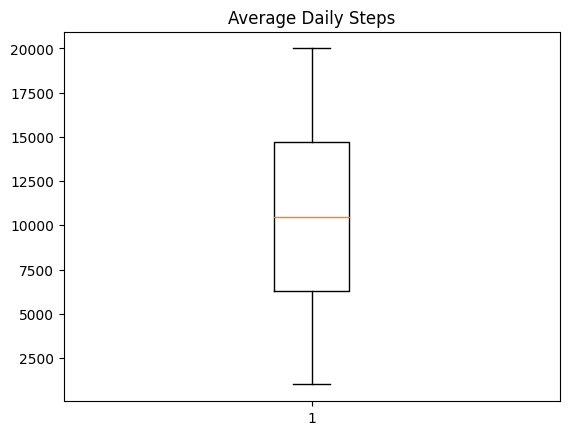

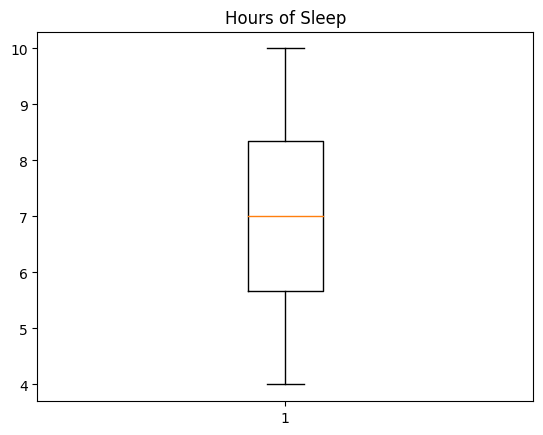

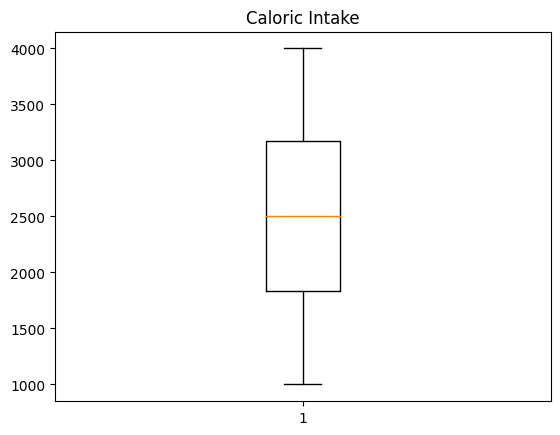

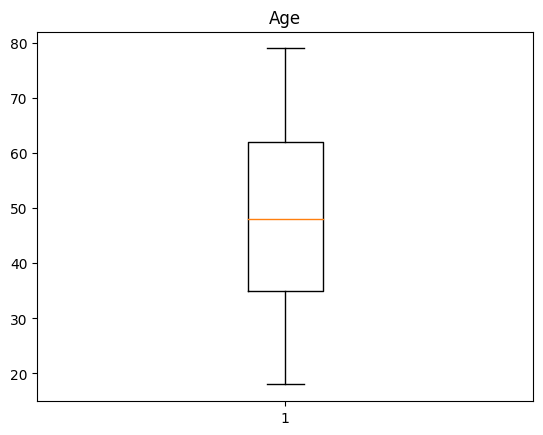

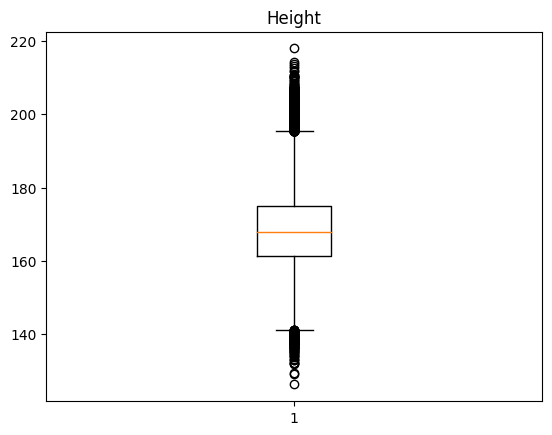

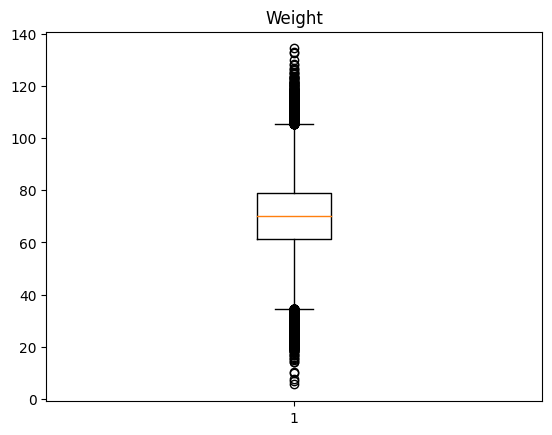

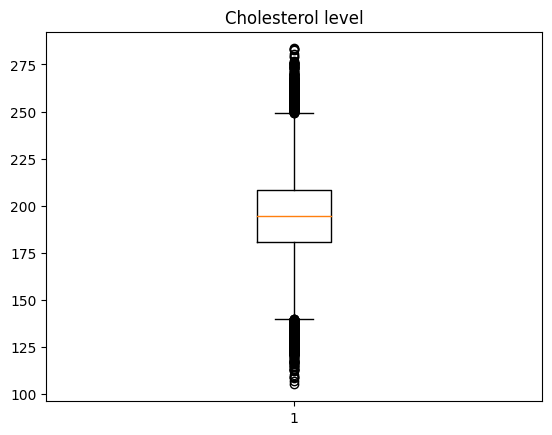

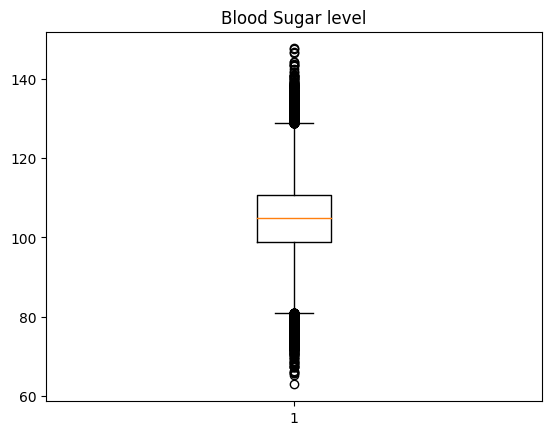

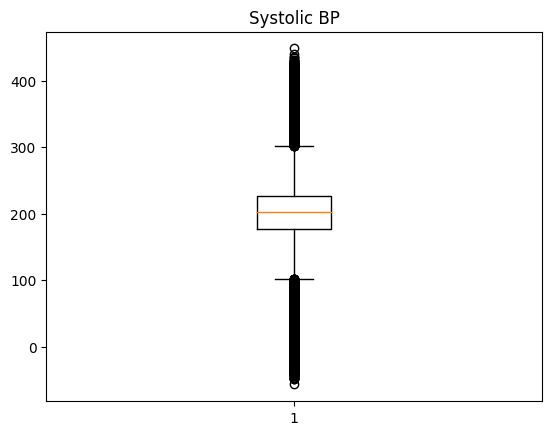

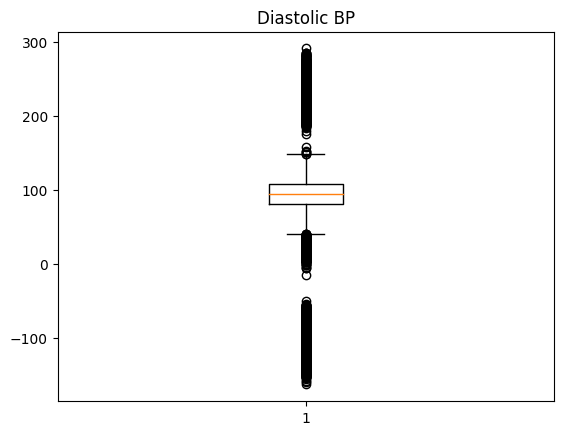

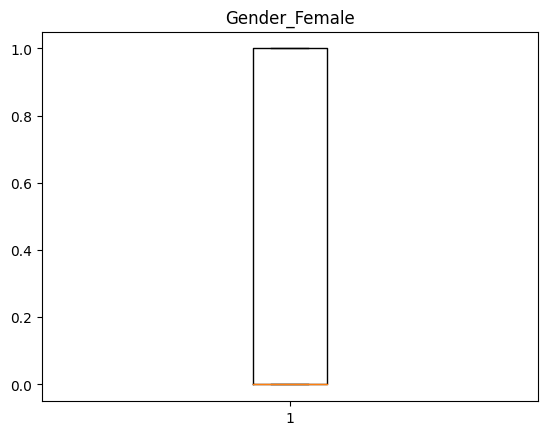

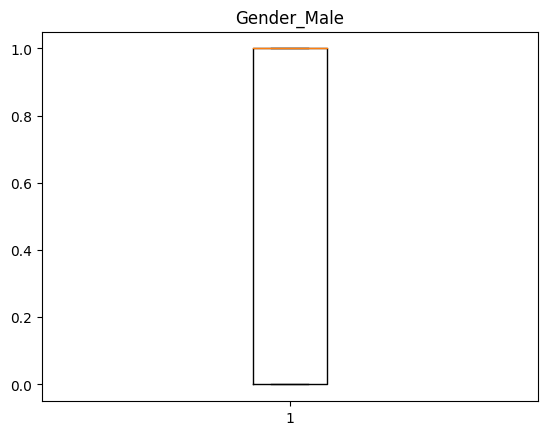

In [1220]:
import matplotlib.pyplot as plt
for i in df.columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [1221]:
df.columns

Index(['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
       'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level',
       'Systolic BP', 'Diastolic BP', 'Gender_Female', 'Gender_Male'],
      dtype='object')

<h2 style='color: orange;'>Replaced Outliers with Lower Limit and Upper Limit</h2>

In [1222]:
def fix_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    dataframe[column] = dataframe[column].apply(lambda x: Q1 if x < lower_limit else Q3 if x > upper_limit else x)
    
cols_fix = ['Height', 'Weight', 'Cholesterol level', 'Blood Sugar level',
       'Systolic BP', 'Diastolic BP']
for column in cols_fix:
    fix_outliers_iqr(df, column)


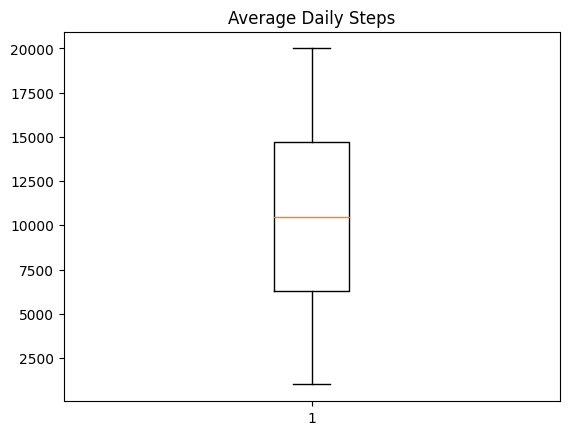

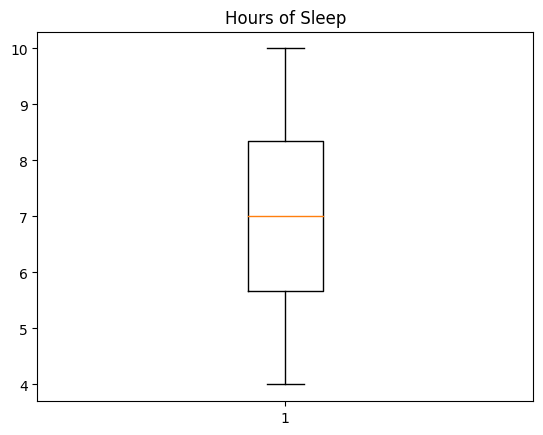

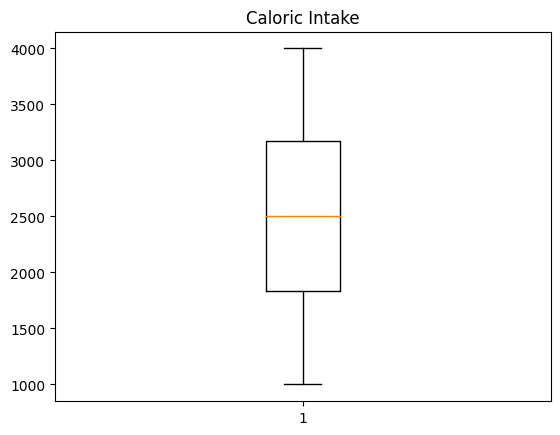

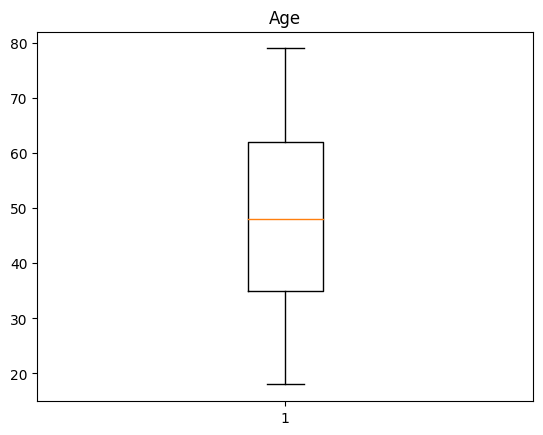

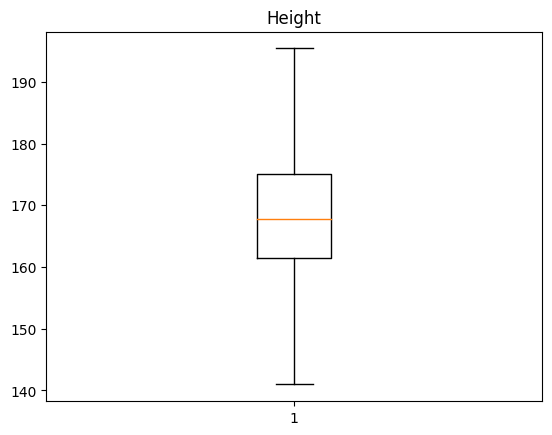

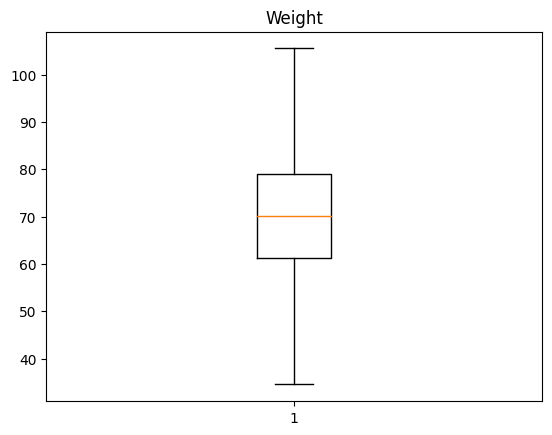

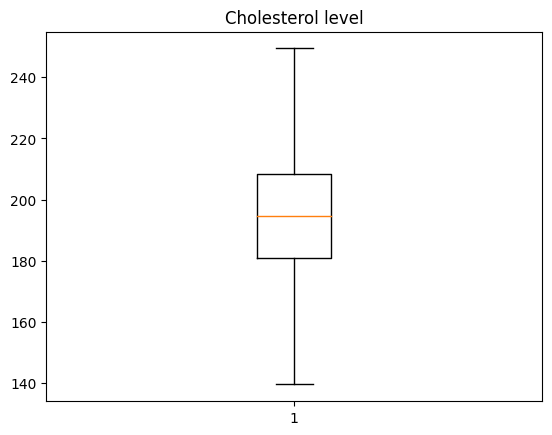

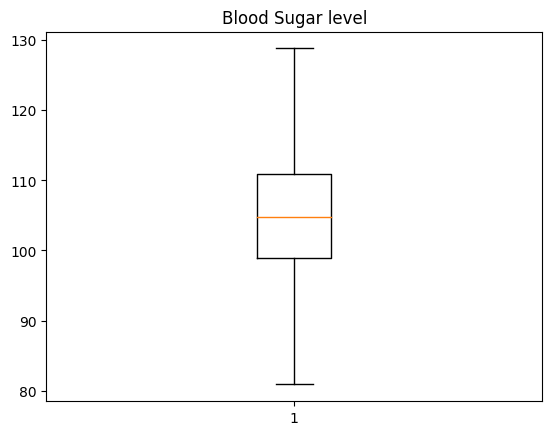

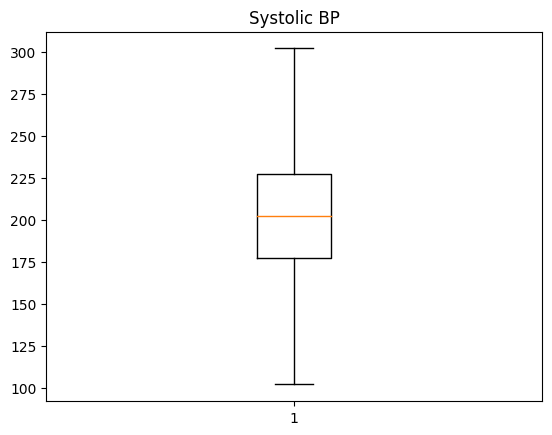

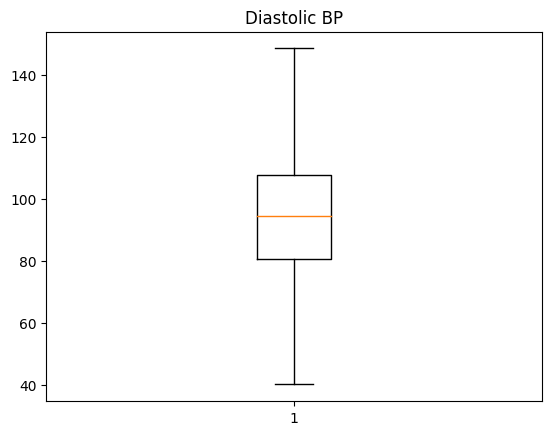

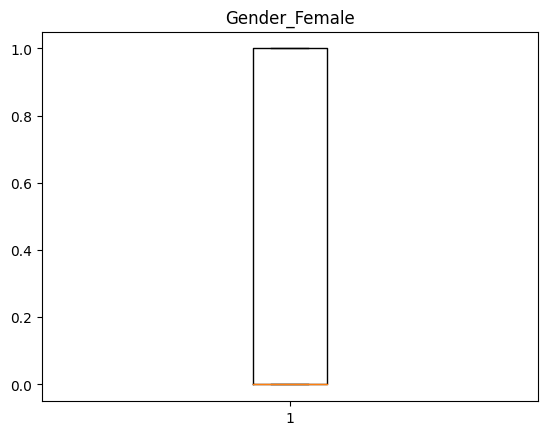

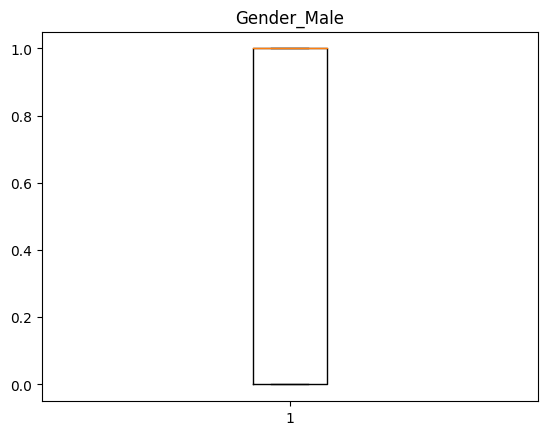

In [1223]:
import matplotlib.pyplot as plt
for i in df.columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [1224]:
df

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP,Gender_Female,Gender_Male
0,15725.0,6.518042,1714.0,56.0,178.416872,75.489346,185.408550,104.442836,172.813045,75.552416,0,1
1,6733.0,9.176300,2508.0,69.0,176.826592,54.635484,191.698148,104.825187,198.729261,80.641721,1,0
2,7424.0,4.856772,1366.0,46.0,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911,0,1
3,11853.0,9.727244,2189.0,32.0,167.812041,59.397202,205.440351,121.982302,204.527361,99.791603,1,0
4,7521.0,6.433183,2342.0,48.0,145.273232,62.574740,161.368583,126.408787,187.882666,88.240932,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2265.0,7.013760,2030.0,53.0,182.202253,65.035350,212.133380,115.360556,227.018047,94.387259,0,1
99996,10959.0,9.661165,2233.0,22.0,185.802297,63.457075,227.699267,112.321197,205.758576,97.740461,0,1
99997,10488.0,7.378317,2080.0,37.0,167.812041,41.227254,224.300704,121.369845,195.905161,80.641721,0,1
99998,12110.0,9.843323,1434.0,72.0,155.025779,78.893698,140.865132,94.524506,149.675364,107.763500,1,0


<h2 style='color: orange;'>Created Linear Regression from Scratch</h2>

In [1225]:
class MY_GD_Regressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):

        # for i in range(self.epochs):
            
        #     y_hat = np.dot(X_train,self.coef_) + self.intercept_
        #     intercept_der =  np.mean(y_hat - y_train)
        #     self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
        #     coef_der =  np.dot((y_hat - y_train),X_train)/X_train.shape[0]
        #     self.coef_ = self.coef_ - (self.lr * coef_der)
        
        self.coef_=np.linalg.inv(np.dot(np.transpose(X),X)).dot(X.T).dot(y)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_)

## Also used inbuilt Linear Regression for comparing slope and intercept.

In [1226]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr2 = LinearRegression()

In [1227]:
lr3 = MY_GD_Regressor(epochs=1000,learning_rate=0.001)
lr4 = MY_GD_Regressor(epochs=1000,learning_rate=0.001)

In [1228]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns=['Systolic BP','Diastolic BP'],axis=1),df['Systolic BP'],test_size=0.25,shuffle=True)
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(df.drop(columns=['Systolic BP','Diastolic BP'],axis=1),df['Diastolic BP'],test_size=0.4,shuffle=True)

In [1229]:
lr1.fit(xtrain,ytrain)
lr2.fit(xtrain1,ytrain1)

lr3.fit(xtrain,ytrain)
lr4.fit(xtrain1,ytrain1)

In [1230]:
from sklearn.metrics import r2_score
print(r2_score(ytest,lr3.predict(xtest)))
r2_score(ytest1,lr4.predict(xtest1))

0.5153061954307772


0.48099174447600546

<h2 style='color: orange;'>Now performing the final predictions on the Test Data.</h2>

In [1231]:
test = pd.read_csv('ML101_dataset_test_feature.csv')
test = pd.get_dummies(test,columns=['Gender'])
test['Gender_Female'] = test['Gender_Female'].astype(int)
test['Gender_Male'] = test['Gender_Male'].astype(int)

In [1232]:
ypred1 = lr3.predict(test)
ypred2 = lr4.predict(test)

<h2 style='color: orange;'>Exporting the Final Predictions to the CSV File </h2>

In [1233]:
id = np.arange(0,test.shape[0])
data = {'ID':id,'Systolic BP': ypred1, 'Diastolic BP': ypred2}
df = pd.DataFrame(data)

csv_file_path = 'BitbyBit.csv'

df.to_csv(csv_file_path, index=False)